In [3]:
# IMPORTAÇÃO DE BLIBLIOTECAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



CARREGAMENTO DE ARQUIVOS

In [4]:
df_resultados_2024_geral = pd.read_csv('RESULTADOS_2024.csv', sep=';' , encoding='latin1')


TRATAMENTO DE DATAFRAME

In [5]:
df_resultados_2024 = df_resultados_2024_geral.copy()

# Filtrar colunas relevantes
colunas_mantidas = [
    'NU_ANO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
    'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT',
    'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
    'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'
]
df_resultados_2024 = df_resultados_2024[colunas_mantidas]

# Remover linhas com todas notas ausentes
df_resultados_2024 = df_resultados_2024.dropna(subset=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'], how='all')

# Calcular média geral
df_resultados_2024['MEDIA_GERAL_2024'] = df_resultados_2024[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)

# Mapear tipo de escola
mapa_escola = {1: 'Não informado', 2: 'Federal', 3: 'Estadual', 4: 'Municipal',  5: 'Privada', 6: 'Exterior'}
df_resultados_2024['TP_DEPENDENCIA_ADM_ESC'] = df_resultados_2024['TP_DEPENDENCIA_ADM_ESC'].map(mapa_escola)



ESTATÍSTICAS NACIONAIS

Estatísticas Nacionais:
Q1: 472.78, Q2 (Mediana): 531.86, Q3: 599.40, Média: 535.04
Distância entre média e mediana: 0.60%
Total de outliers encontrados: 21347


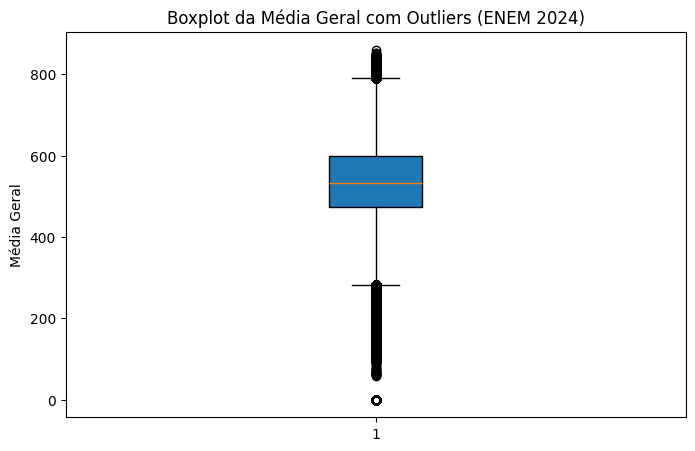

In [6]:
array_media = np.array(df_resultados_2024['MEDIA_GERAL_2024'])
q1, q2, q3 = np.percentile(array_media, [25,50,75])
media, mediana = np.mean(array_media), np.median(array_media)
distancia = (media - mediana) / mediana
distancia_percentual = f"{(distancia * 100):.2f}%"
print("Estatísticas Nacionais:")
print(f"Q1: {q1:.2f}, Q2 (Mediana): {q2:.2f}, Q3: {q3:.2f}, Média: {media:.2f}")
print(f"Distância entre média e mediana: {distancia_percentual}")

# Identificação de outliers
iqr = q3 - q1
limite_inf, limite_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
df_outliers = df_resultados_2024[(df_resultados_2024['MEDIA_GERAL_2024']<limite_inf) | (df_resultados_2024['MEDIA_GERAL_2024']>limite_sup)]
print(f"Total de outliers encontrados: {len(df_outliers)}")


# Visualização dos outliers 
plt.figure(figsize=(8,5))
plt.boxplot(df_resultados_2024['MEDIA_GERAL_2024'], vert=True, patch_artist=True)
plt.title('Boxplot da Média Geral com Outliers (ENEM 2024)')
plt.ylabel('Média Geral')
plt.show()



ESTATISTICAS POR REGIÕES

In [7]:
# DF's POR REGIÕES
df_sudeste = df_resultados_2024[df_resultados_2024['SG_UF_ESC'].isin(['SP', 'RJ', 'MG', 'ES'])]
df_sudeste.drop('MEDIA_GERAL_2024', axis=1, inplace=True)
df_sudeste['MEDIA_SUDESTE_2024'] = df_sudeste[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)

df_sul = df_resultados_2024[df_resultados_2024['SG_UF_ESC'].isin(['PR', 'SC', 'RS'])]
df_sul.drop('MEDIA_GERAL_2024', axis=1, inplace=True)
df_sul['MEDIA_SUL_2024'] = df_sul[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)

df_nordeste = df_resultados_2024[df_resultados_2024['SG_UF_ESC'].isin(['BA', 'SE', 'AL', 'PE', 'PB', 'RN', 'CE', 'PI', 'MA'])]
df_nordeste.drop('MEDIA_GERAL_2024', axis=1, inplace=True)
df_nordeste['MEDIA_NORDESTE_2024'] = df_nordeste[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)

df_norte = df_resultados_2024[df_resultados_2024['SG_UF_ESC'].isin(['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'])]
df_norte.drop('MEDIA_GERAL_2024', axis=1, inplace=True)
df_norte['MEDIA_NORTE_2024'] = df_norte[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)

df_centro_oeste = df_resultados_2024[df_resultados_2024['SG_UF_ESC'].isin(['DF', 'GO', 'MT', 'MS'])]
df_centro_oeste.drop('MEDIA_GERAL_2024', axis=1, inplace=True)
df_centro_oeste['MEDIA_CENTRO_OESTE_2024'] = df_centro_oeste[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)

# NORTE
array_norte = np.array(df_norte['MEDIA_NORTE_2024'])
q1_norte, q2_norte, q3_norte = np.percentile(array_norte, [25,50,75])
media_norte, mediana_norte = np.mean(array_norte), np.median(array_norte)
distancia_norte = (media_norte - mediana_norte) / mediana_norte
distancia_percentual_norte = f"{(distancia_norte * 100):.2f}%"
print("Estatísticas região Norte:")
print(f"Q1: {q1_norte:.2f}, Q2 (Mediana): {q2_norte:.2f}, Q3: {q3_norte:.2f}, Média: {media_norte:.2f}")
print(f"Distância entre média e mediana: {distancia_percentual_norte}")

# Identificação de outliers
iqr_norte = q3_norte - q1_norte
limite_inf_norte, limite_sup_norte = q1_norte - 1.5*iqr_norte, q3_norte + 1.5*iqr_norte
df_outliers_norte = df_norte[(df_norte['MEDIA_NORTE_2024']<limite_inf_norte) | (df_norte['MEDIA_NORTE_2024']>limite_sup_norte)]
print(f"Total de outliers encontrados: {len(df_outliers_norte)}")

# NORDESTE
array_nordeste = np.array(df_nordeste['MEDIA_NORDESTE_2024'])
q1_nordeste, q2_nordeste, q3_nordeste = np.percentile(array_nordeste, [25,50,75])
media_nordeste, mediana_nordeste = np.mean(array_nordeste), np.median(array_nordeste)
distancia_nordeste = (media_nordeste - mediana_nordeste) / mediana_nordeste
distancia_percentual_nordeste = f"{(distancia_nordeste * 100):.2f}%"

print("\nEstatísticas região Nordeste:")
print(f"Q1: {q1_nordeste:.2f}, Q2 (Mediana): {q2_nordeste:.2f}, Q3: {q3_nordeste:.2f}, Média: {media_nordeste:.2f}")
print(f"Distância entre média e mediana: {distancia_percentual_nordeste}")

iqr_nordeste = q3_nordeste - q1_nordeste
limite_inf_nordeste, limite_sup_nordeste = q1_nordeste - 1.5*iqr_nordeste, q3_nordeste + 1.5*iqr_nordeste
df_outliers_nordeste = df_nordeste[(df_nordeste['MEDIA_NORDESTE_2024']<limite_inf_nordeste) | (df_nordeste['MEDIA_NORDESTE_2024']>limite_sup_nordeste)]
print(f"Total de outliers encontrados: {len(df_outliers_nordeste)}")

# CENTRO-OESTE
array_centro = np.array(df_centro_oeste['MEDIA_CENTRO_OESTE_2024'])
q1_centro, q2_centro, q3_centro = np.percentile(array_centro, [25,50,75])
media_centro, mediana_centro = np.mean(array_centro), np.median(array_centro)
distancia_centro = (media_centro - mediana_centro) / mediana_centro
distancia_percentual_centro = f"{(distancia_centro * 100):.2f}%"

print("\nEstatísticas região Centro-Oeste:")
print(f"Q1: {q1_centro:.2f}, Q2 (Mediana): {q2_centro:.2f}, Q3: {q3_centro:.2f}, Média: {media_centro:.2f}")
print(f"Distância entre média e mediana: {distancia_percentual_centro}")

iqr_centro = q3_centro - q1_centro
limite_inf_centro, limite_sup_centro = q1_centro - 1.5*iqr_centro, q3_centro + 1.5*iqr_centro
df_outliers_centro = df_centro_oeste[(df_centro_oeste['MEDIA_CENTRO_OESTE_2024']<limite_inf_centro) | (df_centro_oeste['MEDIA_CENTRO_OESTE_2024']>limite_sup_centro)]
print(f"Total de outliers encontrados: {len(df_outliers_centro)}")

# SUDESTE
array_sudeste = np.array(df_sudeste['MEDIA_SUDESTE_2024'])
q1_sudeste, q2_sudeste, q3_sudeste = np.percentile(array_sudeste, [25,50,75])
media_sudeste, mediana_sudeste = np.mean(array_sudeste), np.median(array_sudeste)
distancia_sudeste = (media_sudeste - mediana_sudeste) / mediana_sudeste
distancia_percentual_sudeste = f"{(distancia_sudeste * 100):.2f}%"

print("\nEstatísticas região Sudeste:")
print(f"Q1: {q1_sudeste:.2f}, Q2 (Mediana): {q2_sudeste:.2f}, Q3: {q3_sudeste:.2f}, Média: {media_sudeste:.2f}")
print(f"Distância entre média e mediana: {distancia_percentual_sudeste}")

iqr_sudeste = q3_sudeste - q1_sudeste
limite_inf_sudeste, limite_sup_sudeste = q1_sudeste - 1.5*iqr_sudeste, q3_sudeste + 1.5*iqr_sudeste
df_outliers_sudeste = df_sudeste[(df_sudeste['MEDIA_SUDESTE_2024']<limite_inf_sudeste) | (df_sudeste['MEDIA_SUDESTE_2024']>limite_sup_sudeste)]
print(f"Total de outliers encontrados: {len(df_outliers_sudeste)}")

# SUL
array_sul = np.array(df_sul['MEDIA_SUL_2024'])
q1_sul, q2_sul, q3_sul = np.percentile(array_sul, [25,50,75])
media_sul, mediana_sul = np.mean(array_sul), np.median(array_sul)
distancia_sul = (media_sul - mediana_sul) / mediana_sul
distancia_percentual_sul = f"{(distancia_sul * 100):.2f}%"

print("\nEstatísticas região Sul:")
print(f"Q1: {q1_sul:.2f}, Q2 (Mediana): {q2_sul:.2f}, Q3: {q3_sul:.2f}, Média: {media_sul:.2f}")
print(f"Distância entre média e mediana: {distancia_percentual_sul}")

iqr_sul = q3_sul - q1_sul
limite_inf_sul, limite_sup_sul = q1_sul - 1.5*iqr_sul, q3_sul + 1.5*iqr_sul
df_outliers_sul = df_sul[(df_sul['MEDIA_SUL_2024']<limite_inf_sul) | (df_sul['MEDIA_SUL_2024']>limite_sup_sul)]
print(f"Total de outliers encontrados: {len(df_outliers_sul)}")


C:\Users\cmjfe\AppData\Local\Temp\ipykernel_8160\3667464743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sudeste.drop('MEDIA_GERAL_2024', axis=1, inplace=True)
C:\Users\cmjfe\AppData\Local\Temp\ipykernel_8160\3667464743.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sudeste['MEDIA_SUDESTE_2024'] = df_sudeste[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)
C:\Users\cmjfe\AppData\Local\Temp\ipykernel_8160\3667464743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Estatísticas região Norte:
Q1: 437.58, Q2 (Mediana): 490.20, Q3: 551.08, Média: 493.97
Distância entre média e mediana: 0.77%
Total de outliers encontrados: 1895

Estatísticas região Nordeste:
Q1: 444.30, Q2 (Mediana): 504.46, Q3: 573.26, Média: 507.43
Distância entre média e mediana: 0.59%
Total de outliers encontrados: 2402

Estatísticas região Centro-Oeste:
Q1: 469.60, Q2 (Mediana): 527.24, Q3: 594.21, Média: 530.68
Distância entre média e mediana: 0.65%
Total de outliers encontrados: 907

Estatísticas região Sudeste:
Q1: 489.06, Q2 (Mediana): 547.50, Q3: 613.64, Média: 550.22
Distância entre média e mediana: 0.50%
Total de outliers encontrados: 2361

Estatísticas região Sul:
Q1: 487.66, Q2 (Mediana): 542.40, Q3: 603.52, Média: 544.13
Distância entre média e mediana: 0.32%
Total de outliers encontrados: 1719


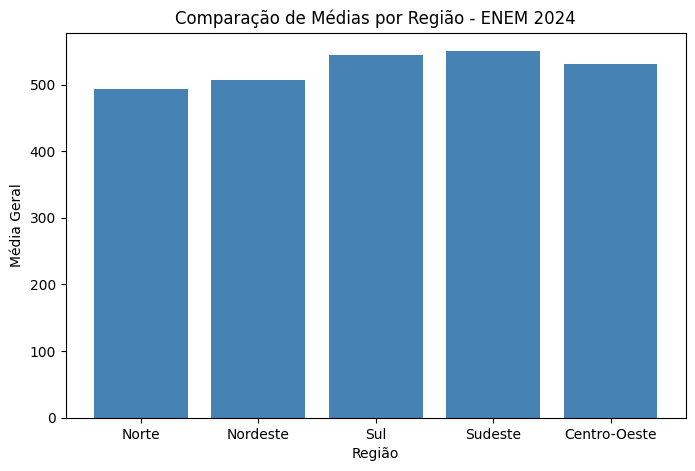

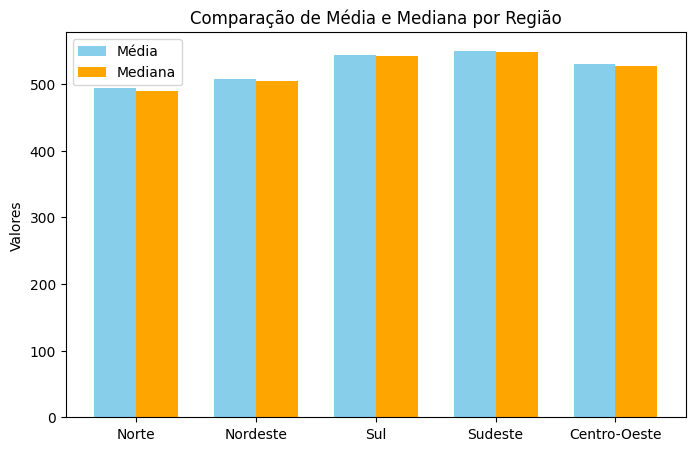

In [8]:
# COMPARAÇÃO DE MÉDIAS ENTRE REGIÕES

medias_regioes = [media_norte, media_nordeste, media_sul, media_sudeste, media_centro]
regioes = ['Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste']

plt.figure(figsize=(8,5))
plt.bar(regioes, medias_regioes, color='steelblue')
plt.title('Comparação de Médias por Região - ENEM 2024')
plt.ylabel('Média Geral')
plt.xlabel('Região')
plt.show()



# COMPARAÇÃO ENTRE MEDIANAS E MÉDIAS

medianas_regioes = [mediana_norte, mediana_nordeste, mediana_sul, mediana_sudeste, mediana_centro]

plt.figure(figsize=(8,5))
bar_width = 0.35
x = np.arange(len(regioes))

plt.bar(x - bar_width/2, medias_regioes, width=bar_width, label='Média', color='skyblue')
plt.bar(x + bar_width/2, medianas_regioes, width=bar_width, label='Mediana', color='orange')

plt.xticks(x, regioes)
plt.ylabel('Valores')
plt.title('Comparação de Média e Mediana por Região')
plt.legend()
plt.show()

ESTATÍSTICAS POR ESTADO

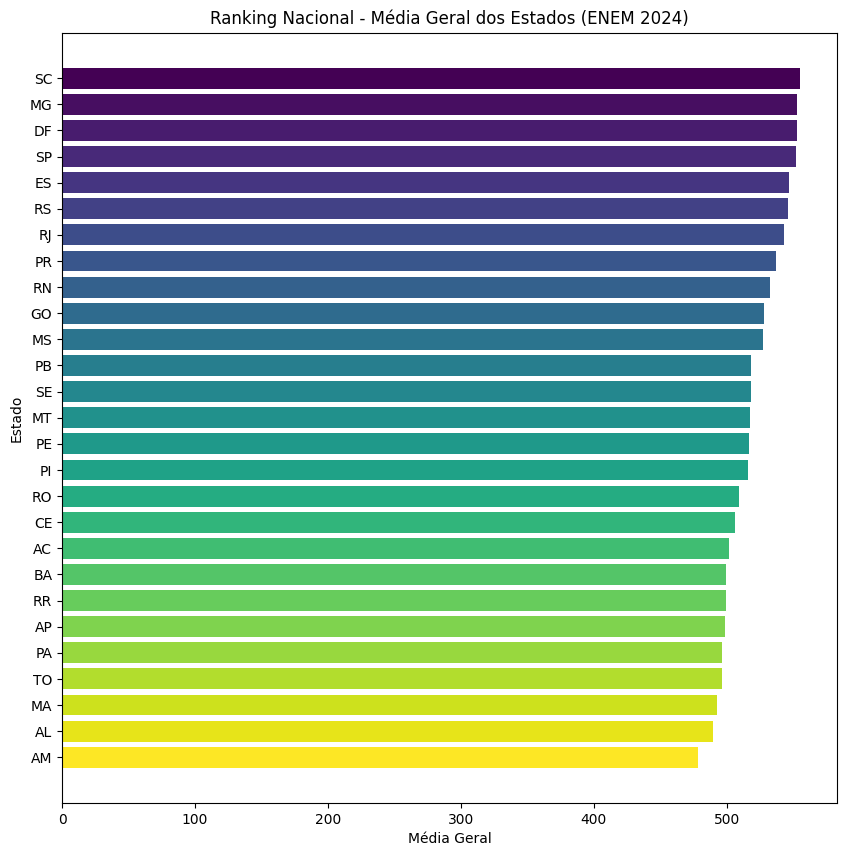


🔝 Estado com maior média: SC (555.15)
🔻 Estado com menor média: AM (478.37)


In [9]:
ranking_brasil = df_resultados_2024.groupby('SG_UF_ESC')['MEDIA_GERAL_2024'].mean().sort_values(ascending=False)
copy_ranking_brasil = ranking_brasil.copy().reset_index()

# Gráfico de barras horizontal com matplotlib
plt.figure(figsize=(10,10))
plt.barh(copy_ranking_brasil['SG_UF_ESC'], copy_ranking_brasil['MEDIA_GERAL_2024'], color=plt.cm.viridis(np.linspace(0, 1, len(copy_ranking_brasil))))

plt.title("Ranking Nacional - Média Geral dos Estados (ENEM 2024)")
plt.xlabel("Média Geral")
plt.ylabel("Estado")
plt.gca().invert_yaxis()  # Inverte o eixo Y para o maior valor ficar no topo
plt.show()

print(f"\n🔝 Estado com maior média: {ranking_brasil.index[0]} ({ranking_brasil.iloc[0]:.2f})")
print(f"🔻 Estado com menor média: {ranking_brasil.index[-1]} ({ranking_brasil.iloc[-1]:.2f})")


RIO DE JANEIRO

In [10]:
# RIO DE JANEIRO
# Filtrar resultados do Rio de Janeiro
df_resultados_rj = df_resultados_2024_geral[df_resultados_2024_geral['SG_UF_ESC'] == 'RJ']
colunas_rj = [
    'NU_ANO', 'NO_MUNICIPIO_ESC', 'TP_DEPENDENCIA_ADM_ESC',
    'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT',
    'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
    'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'
]
colunas_redacao = [
    'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
    'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'
]

df_resultados_rj = df_resultados_rj[colunas_rj]
df_resultados_rj_redacao = df_resultados_rj[colunas_redacao]

df_resultados_rj = df_resultados_rj.dropna(subset=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'], how='all')

df_resultados_rj['MEDIA_RIO_2024'] = df_resultados_rj[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)

df_resultados_rj_redacao = df_resultados_rj_redacao.dropna(subset=['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5'], how='all')